In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
df = pd.read_csv(url)

<Axes: >

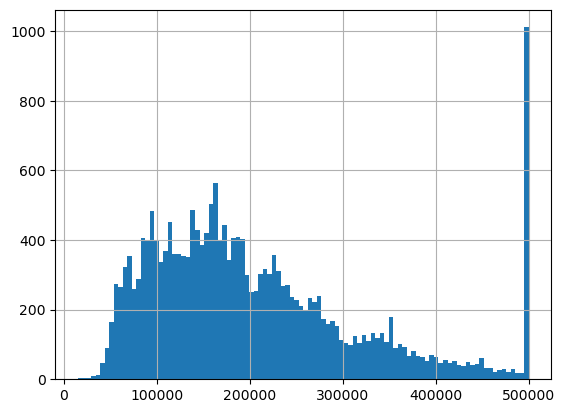

In [4]:
df.median_house_value.hist(bins=100)

In [14]:
# remove 1 column
COLUMNS = [x for x in df.keys() if x!='ocean_proximity']
COLUMNS

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [15]:
filter = df.ocean_proximity.isin(["<1H OCEAN","INLAND"])

ddf = df[filter][COLUMNS]

In [16]:
df.shape

(20640, 10)

In [17]:
# Less columns, less values (filtered)
ddf.shape

(15687, 9)

# Q1

In [19]:
# Q1: total_bedroom has nulls
ddf.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Q2

In [21]:
# Calc median
ddf.population.describe()['50%']

1195.0

# Q3 

In [22]:
# 60%/20%/20% split for train/test/val
n = len(ddf)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test


In [23]:
(n,n_val, n_test, n_train)

(15687, 3137, 3137, 9413)

In [24]:
ddf.iloc[[10, 0, 3, 5]]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
882,-121.96,37.55,4.0,3746.0,993.0,1606.0,838.0,4.1387,162500.0
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
862,-121.99,37.58,31.0,2878.0,478.0,1276.0,485.0,6.2073,282500.0


In [26]:
ddf_train = ddf.iloc[:n_train]
ddf_val = ddf.iloc[n_train:n_train+n_val]
ddf_test = ddf.iloc[n_train+n_val:]

In [28]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 15684, 15685, 15686])

In [29]:
np.random.seed(42)
np.random.shuffle(idx)

In [30]:
# shuffled
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [31]:
ddf_train = ddf.iloc[idx[:n_train]]
ddf_val = ddf.iloc[idx[n_train:n_train+n_val]]
ddf_test = ddf.iloc[idx[n_train+n_val:]]

In [32]:
len(ddf_train), len(ddf_val), len(ddf_test)


(9413, 3137, 3137)

In [33]:
y_train = np.log1p(ddf_train.median_house_value.values )
y_val = np.log1p(ddf_val.median_house_value.values)
y_test = np.log1p(ddf_test.median_house_value.values)

In [35]:
len(y_train)

9413

In [36]:
del ddf_train['median_house_value']
del ddf_val['median_house_value']
del ddf_test['median_house_value']

In [ ]:
# use code from here :https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/notebook.ipynb

# TODO: write function to prep the train/test/val data with seed specified, and fill values param

# TODO: function calc RMSE scores on some

# TODO: function to TRAIN the linear regression with and w/o regularisation (on some dataset X and y)



# Q4

In [ ]:
# tbd

# Q5

In [ ]:
# tbd

# Q6

# tbd